In [75]:
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.linear_model import RidgeCV
from sklearn.metrics import fbeta_score
import pandas as pd
import numpy as np 

In [3]:
wineFrame = pd.read_csv("../DataSet/winequality-red.csv", delimiter=";")

In [5]:
wineFrame

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [129]:
scaler = preprocessing.StandardScaler()

X = np.array([-0.78768, -1.51760513,0.74416271, -0.62288928]).reshape(-1, 1)
Xmean = np.mean([-0.78768, -1.51760513,0.74416271, -0.62288928])
scaler.fit(X)
X_std = scaler.transform(X)
#X with value comprises entre -1 et 1 
y = np.array([-34.59703199, -30.79543532, 19.31018182, -19.44809959]).reshape(-1, 1)
Ymean = np.mean([-34.59703199, -30.79543532, 19.31018182, -19.44809959])
xycov = (X - Xmean) * (y-Ymean)
xvar = (X - Xmean)**2
beta = xycov.sum()/xvar.sum()
print("beta", beta)
scaler.fit(y)
y_std = scaler.transform(y)

beta 24.202879537233613


In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size=0.25)

In [109]:
# baseline solution non regularisée
regr = linear_model.LinearRegression()

In [138]:
#std_scale = preprocessing.StandardScaler().fit(X)
#X_std = std_scale.transform(X)
#print(X_std)
print(y)
regr.fit(X_std, y_std)
regr.coef_
regr.intercept_
betaWithNp = np.polyfit([-0.78768, -1.51760513,0.74416271, -0.62288928], [-34.59703199, -30.79543532, 19.31018182, -19.44809959], 1)[0] 
print(betaWithNp)

[[-34.59703199]
 [-30.79543532]
 [ 19.31018182]
 [-19.44809959]]
24.202879537233603


In [131]:
x_predict = np.array([-0.62288928]).reshape(-1, 1)
y_predict  = regr.predict(np.array([-0.78768, -1.51760513,0.74416271, -0.62288928]).reshape(-1, 1))
print(regr.predict(x_predict))
baseline_error = np.mean((regr.predict(X_test)-y_test) **2)
print(baseline_error)


[[-1.04481682]]
1.1547032128642956


array([[1.24608667]])

In [120]:
#Classifier Ridge 
n_alphas = 100
alphas = np.logspace(-5, 5, n_alphas)
coefs = []
errors = []

ridge = linear_model.Ridge()
for a in alphas: 
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    errors.append(np.mean((ridge.predict(X_test)-y_test)**2))
    coefs.append(ridge.coef_)


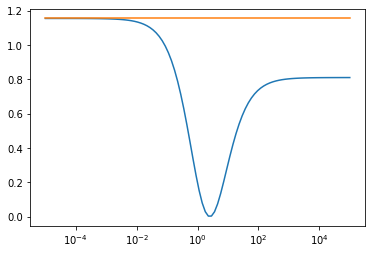

In [122]:
import matplotlib.pyplot as plt
ax = plt.gca()
ax.plot(alphas, errors,  [10**-5, 10**5], [baseline_error, baseline_error])
#ax.plot(baseline_error)
ax.set_xscale("log")

In [123]:
#index de l'erreur la plus petite
errorsIndex = np.argmin(errors)
#valeur de l'erreur la plus petite 
print(errors[errorsIndex])
#coefficient alpha associé 
alphas[errorsIndex]

0.003071900371514829


2.2570197196339215

[array([[1.24608078]]), array([[1.24607924]]), array([[1.24607729]]), array([[1.24607484]]), array([[1.24607174]]), array([[1.24606783]]), array([[1.2460629]]), array([[1.24605668]]), array([[1.24604882]]), array([[1.24603891]]), array([[1.24602641]]), array([[1.24601063]]), array([[1.24599072]]), array([[1.2459656]]), array([[1.2459339]]), array([[1.2458939]]), array([[1.24584343]]), array([[1.24577975]]), array([[1.24569941]]), array([[1.24559804]]), array([[1.24547015]]), array([[1.24530881]]), array([[1.24510528]]), array([[1.24484855]]), array([[1.24452475]]), array([[1.2441164]]), array([[1.2436015]]), array([[1.24295238]]), array([[1.24213425]]), array([[1.24110341]]), array([[1.23980509]]), array([[1.23817067]]), array([[1.2361144]]), array([[1.2335294]]), array([[1.2302829]]), array([[1.22621059]]), array([[1.22111022]]), array([[1.21473452]]), array([[1.20678369]]), array([[1.19689819]]), array([[1.18465287]]), array([[1.16955403]]), array([[1.15104202]]), array([[1.12850244]

ValueError: x and y can be no greater than 2-D, but have shapes (100,) and (100, 1, 1)

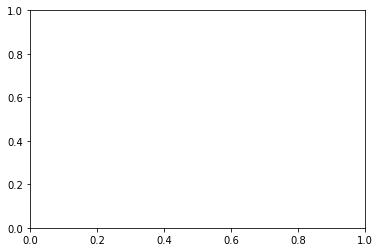

In [143]:
## chemin de regularisation 
chemin = plt.gca()
print(coefs)
chemin.plot(alphas, coefs)
chemin.set_xscale("log")